In [1]:
import pandas as pd
import numpy as np
import mlbstatsapi
import os
from tqdm import tqdm
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv("Score_prediction_dataset_31st_July.csv")

In [3]:
df.head()

Team_Name     Opposition_Team  Inning Home/Away  Hits  Opp_Hits  \
0   Baltimore Orioles  Los Angeles Angels       1      Home     2         1   
1  Los Angeles Angels   Baltimore Orioles       1      Away     1         2   
2   Baltimore Orioles  Los Angeles Angels       2      Home     6         1   
3  Los Angeles Angels   Baltimore Orioles       2      Away     1         6   
4   Baltimore Orioles  Los Angeles Angels       3      Home     6         1   

   Errors  Runs  Opp_Runs  LOB  Opp_LOB  Final_Score  
0       0     2         1    2        0           11  
1       0     1         2    0        2            3  
2       0     5         1    4        0           11  
3       1     1         5    0        4            3  
4       0     5         1    4        0           11

In [4]:
df = df[(df['Team_Name'] != 'American League All-Stars') & (df['Team_Name'] != 'National League All-Stars')]

In [5]:
df['Final_Score'].describe()

count    26760.000000
mean         4.404447
std          3.067667
min          0.000000
25%          2.000000
50%          4.000000
75%          6.000000
max         20.000000
Name: Final_Score, dtype: float64

In [6]:
df['Final_Score'].mode()[0]

3

In [7]:
df['Final_Score'].median()

4.0

In [8]:
# buckets = {1: 0, 2: 1, 3: 2, 4: 3, 5: 4}
# df['Score_Bucket'] = df['Score_Bucket'].map(buckets)

In [9]:
df_preprocessed = df.copy()

In [10]:
len(df_preprocessed)

26760

In [11]:
df_preprocessed = df_preprocessed[df_preprocessed['Inning'] <= 8]

In [12]:
len(df_preprocessed)

26342

In [13]:
df_preprocessed['Inning'].value_counts()

Inning
1    3310
2    3300
3    3292
4    3292
5    3292
6    3290
7    3288
8    3278
Name: count, dtype: int64

In [14]:
df_preprocessed = df_preprocessed.dropna()

In [15]:
df_preprocessed.isna().sum()

Team_Name          0
Opposition_Team    0
Inning             0
Home/Away          0
Hits               0
Opp_Hits           0
Errors             0
Runs               0
Opp_Runs           0
LOB                0
Opp_LOB            0
Final_Score        0
dtype: int64

In [16]:
df_preprocessed["Inning"].value_counts()

Inning
1    3310
2    3300
3    3292
4    3292
5    3292
6    3290
7    3288
8    3278
Name: count, dtype: int64

In [17]:
df_preprocessed

Team_Name       Opposition_Team  Inning Home/Away  Hits  \
0         Baltimore Orioles    Los Angeles Angels       1      Home     2   
1        Los Angeles Angels     Baltimore Orioles       1      Away     1   
2         Baltimore Orioles    Los Angeles Angels       2      Home     6   
3        Los Angeles Angels     Baltimore Orioles       2      Away     1   
4         Baltimore Orioles    Los Angeles Angels       3      Home     6   
...                     ...                   ...     ...       ...   ...   
26771     Oakland Athletics  San Francisco Giants       6      Away     4   
26772  San Francisco Giants     Oakland Athletics       7      Home     4   
26773     Oakland Athletics  San Francisco Giants       7      Away     4   
26774  San Francisco Giants     Oakland Athletics       8      Home     4   
26775     Oakland Athletics  San Francisco Giants       8      Away     4   

       Opp_Hits  Errors  Runs  Opp_Runs  LOB  Opp_LOB  Final_Score  
0             1       0     2         1    2        0           11  
1             2       0     1         2    0        2            3  
2             1       0     5         1    4        0           11  
3             6       1     1         5    0        4            3  
4             1       0     5         1    4        0           11  
...         ...     ...   ...       ...  ...      ...          ...  
26771         4       0     0         1    5        4            0  
26772         4       0     1         0    4        5            1  
26773         4       0     0         1    5        4            0  
26774         4       1     1         0    5        6            1  
26775         4       0     0         1    6        5            0  

[26342 rows x 12 columns]

In [18]:
from sklearn.preprocessing import LabelEncoder

In [19]:
label_encoder_teams = LabelEncoder()

In [20]:
# df_preprocessed['Team_Name'] = label_encoder_teams.fit_transform(df_preprocessed['Team_Name'])
# df_preprocessed['Opposition_Team'] = label_encoder_teams.transform(df_preprocessed['Opposition_Team'])

In [21]:
home_away_status = {'Home': 0, 'Away': 1}
df_preprocessed['Home/Away'] = df['Home/Away'].map(home_away_status)

In [22]:
df_preprocessed = pd.get_dummies(df_preprocessed, columns=['Team_Name', 'Opposition_Team'])

In [23]:
df_preprocessed = df_preprocessed.astype(int)

In [24]:
df_preprocessed.head()

Inning  Home/Away  Hits  Opp_Hits  Errors  Runs  Opp_Runs  LOB  Opp_LOB  \
0       1          0     2         1       0     2         1    2        0   
1       1          1     1         2       0     1         2    0        2   
2       2          0     6         1       0     5         1    4        0   
3       2          1     1         6       1     1         5    0        4   
4       3          0     6         1       0     5         1    4        0   

   Final_Score  ...  Opposition_Team_Philadelphia Phillies  \
0           11  ...                                      0   
1            3  ...                                      0   
2           11  ...                                      0   
3            3  ...                                      0   
4           11  ...                                      0   

   Opposition_Team_Pittsburgh Pirates  Opposition_Team_San Diego Padres  \
0                                   0                                 0   
1                                   0                                 0   
2                                   0                                 0   
3                                   0                                 0   
4                                   0                                 0   

   Opposition_Team_San Francisco Giants  Opposition_Team_Seattle Mariners  \
0                                     0                                 0   
1                                     0                                 0   
2                                     0                                 0   
3                                     0                                 0   
4                                     0                                 0   

   Opposition_Team_St. Louis Cardinals  Opposition_Team_Tampa Bay Rays  \
0                                    0                               0   
1                                    0                               0   
2                                    0                               0   
3                                    0                               0   
4                                    0                               0   

   Opposition_Team_Texas Rangers  Opposition_Team_Toronto Blue Jays  \
0                              0                                  0   
1                              0                                  0   
2                              0                                  0   
3                              0                                  0   
4                              0                                  0   

   Opposition_Team_Washington Nationals  
0                                     0  
1                                     0  
2                                     0  
3                                     0  
4                                     0  

[5 rows x 70 columns]

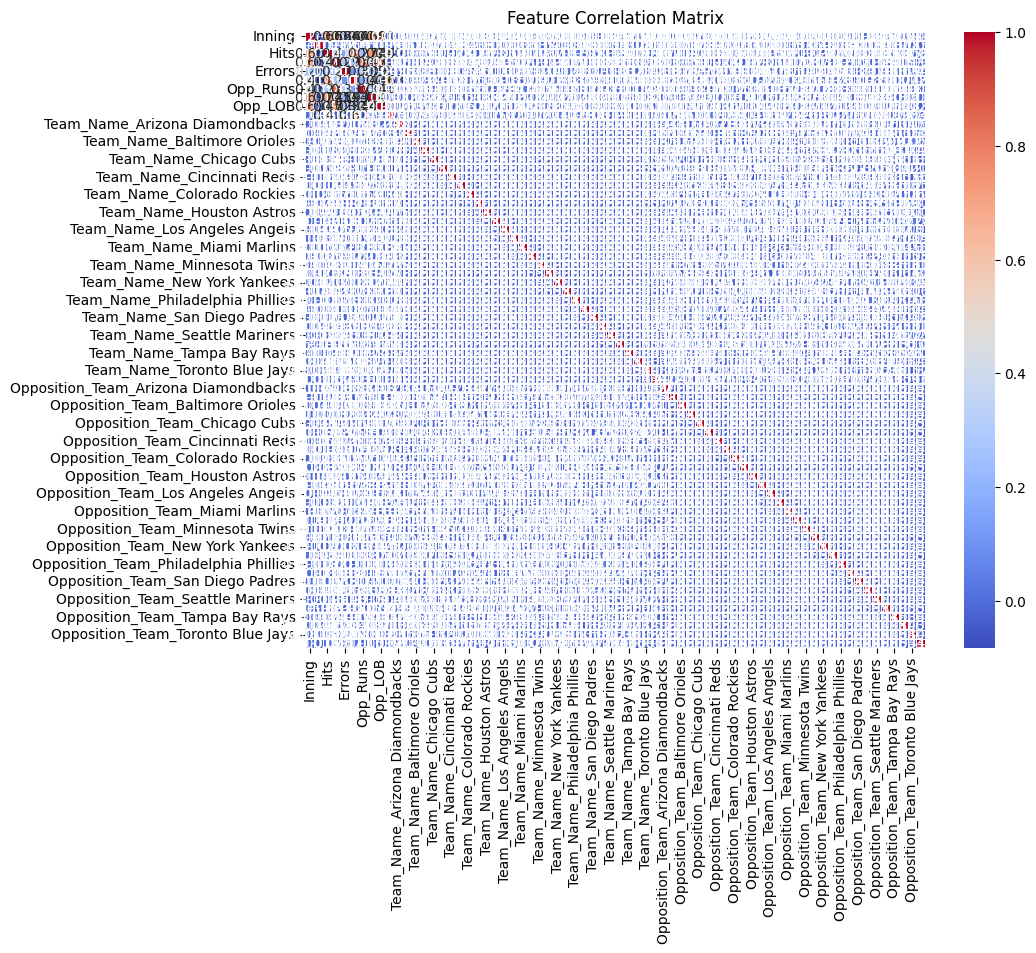

In [25]:
corr_matrix = df_preprocessed.corr()

plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Feature Correlation Matrix')
plt.show()

In [26]:
from sklearn.model_selection import train_test_split, RandomizedSearchCV
from xgboost import XGBRegressor, plot_importance
from sklearn.metrics import classification_report, confusion_matrix, mean_absolute_error, mean_squared_error
import matplotlib.pyplot as plt
import pickle
from sklearn.decomposition import PCA

In [27]:
# Split the dataset into training and testing sets
X = df_preprocessed.drop(columns=['Final_Score', 'Opp_LOB'])
y = df_preprocessed['Final_Score']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify= X['Inning'], random_state=42)

In [28]:
X_train

Inning  Home/Away  Hits  Opp_Hits  Errors  Runs  Opp_Runs  LOB  \
23411       2          1     1         1       0     0         0    2   
9707        6          1     8         3       0     3         2    6   
9786        6          0     4         7       2     2         9    3   
14467       1          1     1         2       0     0         1    2   
12805       7          1     5         8       0     1         3    4   
...       ...        ...   ...       ...     ...   ...       ...  ...   
15512       1          0     1         0       0     0         0    1   
15719       6          1     3         5       1     0         0    3   
13754       7          0     3         7       0     0         3    5   
5094        6          0     7         5       0     1         4    8   
18957       5          1     6         3       0     1         1    5   

       Team_Name_Arizona Diamondbacks  Team_Name_Atlanta Braves  ...  \
23411                               0                         0  ...   
9707                                0                         0  ...   
9786                                0                         0  ...   
14467                               0                         0  ...   
12805                               0                         0  ...   
...                               ...                       ...  ...   
15512                               0                         0  ...   
15719                               0                         0  ...   
13754                               0                         0  ...   
5094                                0                         0  ...   
18957                               0                         0  ...   

       Opposition_Team_Philadelphia Phillies  \
23411                                      0   
9707                                       0   
9786                                       0   
14467                                      0   
12805                                      0   
...                                      ...   
15512                                      0   
15719                                      0   
13754                                      0   
5094                                       0   
18957                                      0   

       Opposition_Team_Pittsburgh Pirates  Opposition_Team_San Diego Padres  \
23411                                   0                                 0   
9707                                    0                                 0   
9786                                    0                                 0   
14467                                   0                                 0   
12805                                   0                                 0   
...                                   ...                               ...   
15512                                   0                                 0   
15719                                   1                                 0   
13754                                   0                                 0   
5094                                    0                                 0   
18957                                   1                                 0   

       Opposition_Team_San Francisco Giants  Opposition_Team_Seattle Mariners  \
23411                                     0                                 0   
9707                                      0                                 0   
9786                                      0                                 0   
14467                                     0                                 0   
12805                                     0                                 0   
...                                     ...                               ...   
15512                                     0                                 0   
15719                                     0                                 0   
13754     

In [29]:
pca = PCA(n_components=60)  # Reduce to 2 components
X_train_pca = pca.fit_transform(X_train)
X_test_pca = pca.transform(X_test)

In [30]:
with open('pca_model5.pkl', 'wb') as file:
    pickle.dump(pca, file)

In [31]:
X_train_pca

array([[-6.08353793, -0.35107097,  0.75262266, ..., -0.06352571,
         0.27853707,  0.38022144],
       [ 3.17016759, -3.29974828,  1.73151525, ..., -0.12845367,
        -0.06967004,  0.12407111],
       [ 3.82794264,  5.31426261, -1.52287704, ..., -0.10776445,
        -0.16063846, -0.29410408],
       ...,
       [ 1.8035343 ,  3.26893467,  2.96008589, ..., -0.13163053,
         0.02836836,  0.25368276],
       [ 4.30487978, -0.16555827,  3.5773228 , ..., -0.03426827,
         0.36864673, -0.18459611],
       [ 0.40196447, -1.89066769,  2.29732325, ..., -0.04058495,
        -0.02542013, -0.22150141]])

In [32]:
# # Define the parameter grid
# param_grid = {
#     'n_estimators': [100, 500, 1000, 1500, 2000, 3000],
#     'learning_rate': [0.001, 0.01, 0.1, 0.2, 0.3],
#     'max_depth': [3, 4, 5, 6, 7, 8, 9, 10],
#     'min_child_weight': [1, 2, 3],
#     'subsample': [0.6, 0.8, 1.0],
#     'colsample_bytree': [0.6, 0.8, 1.0],
#     'gamma': [0, 0.1, 0.2],
#     'reg_alpha': [0, 0.1, 0.5],
#     'reg_lambda': [1, 1.5, 2]
# }

In [33]:
model = XGBRegressor(subsample = 0.8, reg_lambda= 2, reg_alpha= 0, n_estimators = 3000, min_child_weight = 1, max_depth = 10, learning_rate = 0.01, gamma = 0.1, colsample_bytree = 1.0, random_state=42)

In [34]:
# random_search = RandomizedSearchCV(
#     estimator=model,
#     param_distributions=param_grid,
#     n_iter= 300,
#     scoring='neg_mean_squared_error',
#     cv=5,
#     verbose=3,
#     # n_jobs=-1  
# )

In [35]:
model.fit(X_train_pca, y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=1.0, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=0.1, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=0.01, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=10, max_leaves=None,
             min_child_weight=1, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=3000, n_jobs=None,
             num_parallel_tree=None, random_state=42, ...)

In [36]:
# # Get the best parameters and model
# best_params = random_search.best_params_
# best_model = random_search.best_estimator_

In [37]:
# print("Best Parameters:", best_params)

In [38]:
y_pred = model.predict(X_test_pca)

In [39]:
y_pred = np.clip(y_pred, a_min=0, a_max=None)

In [40]:
y_pred = np.round(y_pred,1)

In [41]:
print("Mean Squared Error:", mean_squared_error(y_test, y_pred))


Mean Squared Error: 2.369428726212379


In [42]:
print("Mean Absolute Error:", mean_absolute_error(y_test, y_pred))


Mean Absolute Error: 1.021977600227058


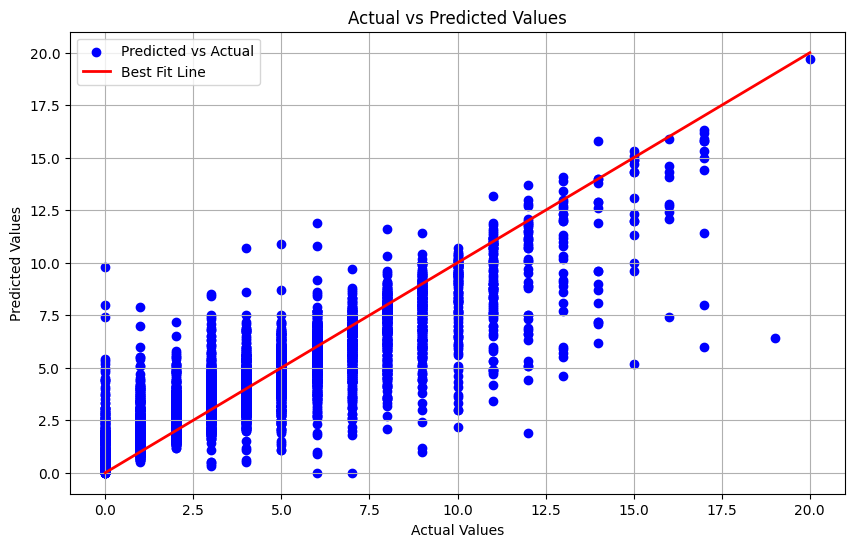

In [43]:
# Plot actual vs. predicted values
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, color='blue', label='Predicted vs Actual')
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linewidth=2, label='Best Fit Line')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Actual vs Predicted Values')
plt.legend()
plt.grid(True)
plt.show()

In [44]:
len(y_test)

5269

In [45]:
model.save_model('xgbr1_exp8_model.json')

In [46]:
# with open('label_encoder_teams_xgbr1_exp3.pkl', 'wb') as f:
#     pickle.dump(label_encoder_teams, f)

In [47]:
y_test.iloc[0]

7

In [48]:
y_pred

array([6. , 4.9, 3.4, ..., 6.4, 6.9, 5.1], dtype=float32)

In [49]:
count = 0
for i in range(len(y_test)):
    if y_test.iloc[i] == np.round(y_pred[i]) :
        count +=1

In [50]:
count   #37.9%

2131

In [51]:
count = 0
for i in range(len(y_test)):
    if (y_pred[i] <= y_test.iloc[i] + 2) and (y_pred[i] >= y_test.iloc[i] - 2):        
        count +=1

In [52]:
count #83.2%

4595

In [53]:
count = 0
for i in range(len(y_test)):
    if (y_pred[i] <= y_test.iloc[i] + 1) and (y_pred[i] >= y_test.iloc[i] - 1):        
        count +=1

In [54]:
count  #62.8%

3522

In [55]:
feature_importances = model.feature_importances_

In [56]:
feature_importances

array([0.01245314, 0.0832073 , 0.09354924, 0.01105447, 0.0078869 ,
       0.01835307, 0.00704854, 0.00992431, 0.00935886, 0.01481202,
       0.0134168 , 0.01155422, 0.01153196, 0.01294994, 0.01207331,
       0.01181099, 0.01243903, 0.01280843, 0.01479791, 0.01387152,
       0.01252589, 0.01646856, 0.01421778, 0.0148498 , 0.01301299,
       0.01449208, 0.01517513, 0.01397395, 0.01330468, 0.01448865,
       0.01302934, 0.01304924, 0.01414081, 0.0159858 , 0.01467452,
       0.01553297, 0.01641459, 0.01410376, 0.01577256, 0.01515148,
       0.01689605, 0.01449434, 0.0166048 , 0.01143996, 0.01639907,
       0.01776871, 0.01328293, 0.01734682, 0.01497262, 0.01303842,
       0.01791866, 0.013211  , 0.01813001, 0.01501922, 0.01616102,
       0.01874877, 0.0175286 , 0.01561574, 0.0148169 , 0.0153398 ],
      dtype=float32)

In [57]:
len(feature_importances)

60

In [58]:
# importance_df = pd.DataFrame({
#     'Feature': X.columns,
#     'Importance': feature_importances
# }).sort_values(by='Importance', ascending=False)

In [59]:
# print("Feature Importance Scores:")
# print(importance_df)

In [60]:
# plt.figure(figsize=(10, 8))
# plt.barh(importance_df['Feature'], importance_df['Importance'], color='skyblue')
# plt.title('Feature Importance')
# plt.show()

In [61]:
X_test['Final Score'] = y_test
X_test['Predicted Score'] = y_pred

In [62]:
X_test

Inning  Home/Away  Hits  Opp_Hits  Errors  Runs  Opp_Runs  LOB  \
17342       7          0     5         3       1     5         1    6   
9976        2          0     4         0       0     2         0    3   
21703       8          1     6         5       1     3         2    6   
8918        2          0     1         2       0     4         1    2   
20203       8          1     6         3       1     2         2    4   
...       ...        ...   ...       ...     ...   ...       ...  ...   
23725       6          1     0         6       1     0         2    0   
8291        1          1     0         0       0     0         0    0   
26662       1          0     1         1       0     0         0    1   
7804        1          0     0         0       0     0         0    0   
26243       3          1     0         1       0     0         0    0   

       Team_Name_Arizona Diamondbacks  Team_Name_Atlanta Braves  ...  \
17342                               0                         0  ...   
9976                                0                         0  ...   
21703                               0                         0  ...   
8918                                0                         0  ...   
20203                               0                         0  ...   
...                               ...                       ...  ...   
23725                               0                         0  ...   
8291                                0                         0  ...   
26662                               1                         0  ...   
7804                                0                         0  ...   
26243                               0                         0  ...   

       Opposition_Team_San Diego Padres  Opposition_Team_San Francisco Giants  \
17342                                 0                                     0   
9976                                  0                                     0   
21703                                 0                                     0   
8918                                  0                                     0   
20203                                 0                                     0   
...                                 ...                                   ...   
23725                                 0                                     1   
8291                                  0                                     0   
26662                                 0                                     0   
7804                                  0                                     0   
26243                                 0                                     0   

       Opposition_Team_Seattle Mariners  Opposition_Team_St. Louis Cardinals  \
17342                                 0                                    0   
9976                                  0                                    0   
21703                                 0                                    0   
8918                                  0                                    0   
20203                                 1                                    0   
...                                 ...                                  ...   
23725                                 0                                    0   
8291                                  0                                    0   
26662                                 0                                    0   
7804                                  0                                    0   
26243                                 0                                    0   

       Opposition_Team_Tampa Bay Rays  Opposition_Team_Texas Rangers  \
17342                               0                              1   
9976                                0                              0   
21703                               0                              0   
8918                                0      

In [63]:
count = 0
df_range_1 = pd.DataFrame(columns= ["Inning", "Final Score", "Predicted Score"])
for i in range(len(X_test)):
    if (X_test['Predicted Score'].iloc[i] <= X_test['Final Score'].iloc[i]+1) and (X_test['Predicted Score'].iloc[i] >= X_test['Final Score'].iloc[i] - 1):        
        # df_range_2.add(original_df.iloc[i])
        row = X_test.iloc[i].to_list()
        dict = {"Inning": row[0], "Final Score": row[68], "Predicted Score": row[69]}
        row_df = pd.DataFrame([dict])
        df_range_1 = pd.concat([df_range_1, row_df], ignore_index=True)


C:\Users\AL-User.LAP-043\AppData\Local\Temp\ipykernel_13484\1124030003.py:9: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  df_range_1 = pd.concat([df_range_1, row_df], ignore_index=True)


In [64]:
df_range_1

Inning  Final Score  Predicted Score
0        7.0          7.0              6.0
1        2.0          4.0              4.9
2        8.0          3.0              3.4
3        8.0          2.0              2.5
4        7.0          1.0              1.2
...      ...          ...              ...
3517     4.0          2.0              2.8
3518     8.0          3.0              3.0
3519     5.0          8.0              7.5
3520     6.0          2.0              1.8
3521     3.0          5.0              5.1

[3522 rows x 3 columns]

In [65]:
df_range_1["Inning"].value_counts()

Inning
7.0    572
8.0    568
6.0    500
5.0    497
4.0    414
3.0    387
2.0    334
1.0    250
Name: count, dtype: int64

In [66]:
X_test["Inning"].value_counts()

Inning
1    662
2    660
5    659
7    658
4    658
3    658
6    658
8    656
Name: count, dtype: int64

In [67]:
# prev_model = XGBRegressor()
# prev_model.load_model('xgbr1_exp7_model.json')

In [68]:
# y_pred = prev_model.predict(X_test_pca)

In [69]:
# y_pred = np.clip(y_pred, a_min=0, a_max=None)

In [70]:
# y_pred = np.round(y_pred,1)

In [71]:
# X_test['Final Score'] = y_test
# X_test['Predicted Score'] = y_pred

In [72]:
# X_test

In [73]:
count = 0
df_range_1 = pd.DataFrame(columns= X_test.columns)
for i in tqdm(range(len(X_test))):
    if (X_test['Predicted Score'].iloc[i] <= X_test['Final Score'].iloc[i]+1) and (X_test['Predicted Score'].iloc[i] >= X_test['Final Score'].iloc[i] - 1):        
        # df_range_2.add(original_df.iloc[i])
        row = X_test.iloc[i].to_list()
        # dict = {"Inning": row[0], "Final Score": row[68], "Predicted Score": row[69]}
        row_df = pd.DataFrame([row], columns=X_test.columns)
        df_range_1 = pd.concat([df_range_1, row_df], ignore_index=True)

  0%|          | 0/5269 [00:00<?, ?it/s]C:\Users\AL-User.LAP-043\AppData\Local\Temp\ipykernel_13484\268927946.py:9: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  df_range_1 = pd.concat([df_range_1, row_df], ignore_index=True)
100%|██████████| 5269/5269 [00:02<00:00, 1840.06it/s]


In [74]:
# df_range_1["Inning"].value_counts()

In [75]:
df_range_1_filtered = df_range_1[df_range_1["Inning"] >=5]

In [76]:
X_test_filterd = X_test[X_test["Inning"] >=5]

In [77]:
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

In [78]:
df_range_1.head()

Inning  Home/Away  Hits  Opp_Hits  Errors  Runs  Opp_Runs  LOB  \
0     7.0        0.0   5.0       3.0     1.0   5.0       1.0  6.0   
1     2.0        0.0   4.0       0.0     0.0   2.0       0.0  3.0   
2     8.0        1.0   6.0       5.0     1.0   3.0       2.0  6.0   
3     8.0        1.0   6.0       3.0     1.0   2.0       2.0  4.0   
4     7.0        1.0   4.0       9.0     1.0   1.0       5.0  4.0   

   Team_Name_Arizona Diamondbacks  Team_Name_Atlanta Braves  \
0                             0.0                       0.0   
1                             0.0                       0.0   
2                             0.0                       0.0   
3                             0.0                       0.0   
4                             0.0                       0.0   

   Team_Name_Baltimore Orioles  Team_Name_Boston Red Sox  \
0                          0.0                       0.0   
1                          0.0                       0.0   
2                          1.0                       0.0   
3                          0.0                       0.0   
4                          0.0                       0.0   

   Team_Name_Chicago Cubs  Team_Name_Chicago White Sox  \
0                     0.0                          0.0   
1                     0.0                          0.0   
2                     0.0                          0.0   
3                     0.0                          0.0   
4                     0.0                          0.0   

   Team_Name_Cincinnati Reds  Team_Name_Cleveland Guardians  \
0                        0.0                            0.0   
1                        0.0                            0.0   
2                        0.0                            0.0   
3                        0.0                            0.0   
4                        0.0                            0.0   

   Team_Name_Colorado Rockies  Team_Name_Detroit Tigers  \
0                         0.0                       0.0   
1                         0.0                       0.0   
2                         0.0                       0.0   
3                         0.0                       0.0   
4                         0.0                       0.0   

   Team_Name_Houston Astros  Team_Name_Kansas City Royals  \
0                       0.0                           0.0   
1                       0.0                           0.0   
2                       0.0                           0.0   
3                       0.0                           0.0   
4                       0.0                           0.0   

   Team_Name_Los Angeles Angels  Team_Name_Los Angeles Dodgers  \
0                           0.0                            0.0   
1                           0.0                            0.0   
2                           0.0                            0.0   
3                           0.0                            0.0   
4                           0.0                            0.0   

   Team_Name_Miami Marlins  Team_Name_Milwaukee Brewers  \
0                      0.0                          0.0   
1                      0.0                          0.0   
2                      0.0                          0.0   
3                      0.0                          0.0   
4                      0.0                          0.0   

   Team_Name_Minnesota Twins  Team_Name_New York Mets  \
0                        0.0                      0.0   
1                        0.0                      0.0   
2                        0.0                      0.0   
3                        1.0                      0.0   
4                        0.0                      0.0   

   Team_Name_New York Yankees  Team_Name_Oakland Athletics  \
0                         0.0                          0.0   
1                         0.0                          0.0   
2                         0.0                          0.0   
3                         0.0                          

In [79]:
df_range_1.iloc[:7,8:38]

Team_Name_Arizona Diamondbacks  Team_Name_Atlanta Braves  \
0                             0.0                       0.0   
1                             0.0                       0.0   
2                             0.0                       0.0   
3                             0.0                       0.0   
4                             0.0                       0.0   
5                             0.0                       0.0   
6                             0.0                       0.0   

   Team_Name_Baltimore Orioles  Team_Name_Boston Red Sox  \
0                          0.0                       0.0   
1                          0.0                       0.0   
2                          1.0                       0.0   
3                          0.0                       0.0   
4                          0.0                       0.0   
5                          0.0                       0.0   
6                          0.0                       0.0   

   Team_Name_Chicago Cubs  Team_Name_Chicago White Sox  \
0                     0.0                          0.0   
1                     0.0                          0.0   
2                     0.0                          0.0   
3                     0.0                          0.0   
4                     0.0                          0.0   
5                     0.0                          1.0   
6                     0.0                          0.0   

   Team_Name_Cincinnati Reds  Team_Name_Cleveland Guardians  \
0                        0.0                            0.0   
1                        0.0                            0.0   
2                        0.0                            0.0   
3                        0.0                            0.0   
4                        0.0                            0.0   
5                        0.0                            0.0   
6                        0.0                            0.0   

   Team_Name_Colorado Rockies  Team_Name_Detroit Tigers  \
0                         0.0                       0.0   
1                         0.0                       0.0   
2                         0.0                       0.0   
3                         0.0                       0.0   
4                         0.0                       0.0   
5                         0.0                       0.0   
6                         0.0                       0.0   

   Team_Name_Houston Astros  Team_Name_Kansas City Royals  \
0                       0.0                           0.0   
1                       0.0                           0.0   
2                       0.0                           0.0   
3                       0.0                           0.0   
4                       0.0                           0.0   
5                       0.0                           0.0   
6                       0.0                           1.0   

   Team_Name_Los Angeles Angels  Team_Name_Los Angeles Dodgers  \
0                           0.0                            0.0   
1                           0.0                            0.0   
2                           0.0                            0.0   
3                           0.0                            0.0   
4                           0.0                            0.0   
5                           0.0                            0.0   
6                           0.0                            0.0   

   Team_Name_Miami Marlins  Team_Name_Milwaukee Brewers  \
0                      0.0                          0.0   
1                      0.0                          0.0   
2                      0.0                          0.0   
3                      0.0                          0.0   
4                      0.0                          0.0   
5                      0.0                          0.0   
6                      0.0                          0.0   

   Team_Name_Minnesota Twins  Team_Name_New York Mets  \
0                        0

In [82]:
df_range_1_filtered = df_range_1[df_range_1["Inning"] >= 7]
X_test_filterd = X_test[X_test["Inning"] >= 7]
# for i in range(len(df_range_1_filtered)):
df_teams_pred = df_range_1_filtered.iloc[:, 8:68]
X_test_teams_pred = X_test_filterd.iloc[:, 8:68]
for j in range(30):
    team_pred_home = df_teams_pred.iloc[:,j]
    team_test_home = X_test_teams_pred.iloc[:,j]

    team_pred_away = df_teams_pred.iloc[:,30+j]
    team_test_away = X_test_teams_pred.iloc[:,30+j]

    print(df_teams_pred.columns[j])
    print((team_pred_home.value_counts()[1] + team_pred_away.value_counts()[1])/ (team_test_home.value_counts()[1] + team_test_away.value_counts()[1]))
    # print(team_test_home.value_counts()[1] + team_test_away.value_counts()[1])

    # break
    

Team_Name_Arizona Diamondbacks
0.8625
Team_Name_Atlanta Braves
0.9186046511627907
Team_Name_Baltimore Orioles
0.8936170212765957
Team_Name_Boston Red Sox
0.775
Team_Name_Chicago Cubs
0.8586956521739131
Team_Name_Chicago White Sox
0.8901098901098901
Team_Name_Cincinnati Reds
0.9340659340659341
Team_Name_Cleveland Guardians
0.891566265060241
Team_Name_Colorado Rockies
0.7830188679245284
Team_Name_Detroit Tigers
0.8681318681318682
Team_Name_Houston Astros
0.8695652173913043
Team_Name_Kansas City Royals
0.8673469387755102
Team_Name_Los Angeles Angels
0.8809523809523809
Team_Name_Los Angeles Dodgers
0.9213483146067416
Team_Name_Miami Marlins
0.8863636363636364
Team_Name_Milwaukee Brewers
0.8901098901098901
Team_Name_Minnesota Twins
0.8488372093023255
Team_Name_New York Mets
0.8514851485148515
Team_Name_New York Yankees
0.7948717948717948
Team_Name_Oakland Athletics
0.9113924050632911
Team_Name_Philadelphia Phillies
0.8705882352941177
Team_Name_Pittsburgh Pirates
0.8831168831168831
Team_Name

In [ ]:
df_range_1_filtered['Team_Name_Arizona Diamondbacks'].value_counts()

Team_Name_Arizona Diamondbacks
0.0    1268
1.0      38
Name: count, dtype: int64

In [ ]:
X_test_filterd['Team_Name_Arizona Diamondbacks'].value_counts()

Team_Name_Arizona Diamondbacks
0    2520
1      87
Name: count, dtype: int64

In [ ]:
df_range_1_filtered['Team_Name_Atlanta Braves'].value_counts()

Team_Name_Atlanta Braves
0.0    1263
1.0      43
Name: count, dtype: int64

In [ ]:
X_test_filterd['Team_Name_Atlanta Braves'].value_counts()

Team_Name_Atlanta Braves
0    2528
1      79
Name: count, dtype: int64